Datasets

1. Historical population dataset (csv): a range of statistics and indicators
2. Green growth indicators dataset (csv): indicators for monitoring progress towards green growth
3. Economic Outlook dataset (API): annual and quarterly economic data 


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Green growth:
1) Importing and reviewing the dataset
2) Selecting variables based on most datapoints
3) Reviewing data for selected variables 
4) Reviewing selected variables for one country, Ireland

In [4]:
green_growth = pd.read_csv("GreenGrowth_OECD.csv", index_col = 0)
green_growth.head()

,Country,VAR,Variable,YEA,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
COU,,,,,,,,,,,,,,
AUS,Australia,CO2_PBPROD,"Production-based CO2 productivity, GDP per uni...",1990,1990,USD_KG,US dollars per kilogram,0,Units,2015,2015,1.961928,NaN,NaN
AUS,Australia,CO2_PBPROD,"Production-based CO2 productivity, GDP per uni...",1995,1995,USD_KG,US dollars per kilogram,0,Units,2015,2015,2.091676,NaN,NaN
AUS,Australia,CO2_PBPROD,"Production-based CO2 productivity, GDP per uni...",2000,2000,USD_KG,US dollars per kilogram,0,Units,2015,2015,2.156981,NaN,NaN
AUS,Australia,CO2_PBPROD,"Production-based CO2 productivity, GDP per uni...",2010,2010,USD_KG,US dollars per kilogram,0,Units,2015,2015,2.556194,NaN,NaN
AUS,Australia,CO2_PBPROD,"Production-based CO2 productivity, GDP per uni...",2015,2015,USD_KG,US dollars per kilogram,0,Units,2015,2015,3.020283,NaN,NaN


In [5]:
green_growth.describe()

,YEA,Year,PowerCode Code,Value
count,143260.000000,143260.000000,143260.000000,1.432600e+05
mean,2010.670739,2010.670739,0.181223,4.011952e+06
std,9.876944,9.876944,1.026890,1.053445e+09
min,1990.000000,1990.000000,0.000000,-5.059876e+03
25%,2000.000000,2000.000000,0.000000,1.276220e+00
50%,2016.000000,2016.000000,0.000000,1.189200e+01
75%,2018.000000,2018.000000,0.000000,6.515363e+01
max,2021.000000,2021.000000,6.000000,3.217270e+11


In [6]:
green_growth.columns

Index(['Country', 'VAR', 'Variable', 'YEA', 'Year', 'Unit Code', 'Unit',
       'PowerCode Code', 'PowerCode', 'Reference Period Code',
       'Reference Period', 'Value', 'Flag Codes', 'Flags'],
      dtype='object')

In [7]:
green_growth.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143260 entries, AUS to MHL
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Country                143260 non-null  object 
 1   VAR                    143260 non-null  object 
 2   Variable               143260 non-null  object 
 3   YEA                    143260 non-null  int64  
 4   Year                   143260 non-null  int64  
 5   Unit Code              129641 non-null  object 
 6   Unit                   129641 non-null  object 
 7   PowerCode Code         143260 non-null  int64  
 8   PowerCode              143260 non-null  object 
 9   Reference Period Code  21206 non-null   object 
 10  Reference Period       21206 non-null   object 
 11  Value                  143260 non-null  float64
 12  Flag Codes             26069 non-null   object 
 13  Flags                  26069 non-null   object 
dtypes: float64(1), int64(3), object(10)
memory

In [8]:
green_growth['Variable']

COU
AUS    Production-based CO2 productivity, GDP per uni...
AUS    Production-based CO2 productivity, GDP per uni...
AUS    Production-based CO2 productivity, GDP per uni...
AUS    Production-based CO2 productivity, GDP per uni...
AUS    Production-based CO2 productivity, GDP per uni...
                             ...                        
MHL                                    Biomass, % of DMC
MHL                                    Biomass, % of DMC
MHL                                    Biomass, % of DMC
MHL                                    Biomass, % of DMC
MHL                                    Biomass, % of DMC
Name: Variable, Length: 143260, dtype: object

In [9]:
green_growth.Variable.value_counts()

Population density, inhabitants per km2                     2437
Population                                                  2300
Annual surface temperature, change since 1951-1980          2243
Nominal exchange rate                                       2236
GDP deflator                                                2170
                                                            ... 
Threatened bird species, % total known species                71
Threatened vascular plant species, % total known species      69
Threatened mammal species, % total known species              67
Total renewable freshwater per capita                         42
Environmentally related R&D expenditure, % GDP                39
Name: Variable, Length: 159, dtype: int64

In [10]:
green_growth.Country.value_counts()

Denmark              1182
Japan                1180
France               1177
Netherlands          1171
Norway               1165
                     ... 
Saint Martin           57
Saint Barthélemy       51
Antarctica             42
Bonaire                22
Clipperton Island      22
Name: Country, Length: 237, dtype: int64

In [11]:
unique_countries = green_growth["Country"].unique()
print(unique_countries)

['Australia' 'Austria' 'Belgium' 'Canada' 'Czech Republic' 'Denmark'
 'Finland' 'France' 'Germany' 'Greece' 'Hungary' 'Iceland' 'Ireland'
 'Italy' 'Japan' 'Korea' 'Luxembourg' 'Mexico' 'Netherlands' 'New Zealand'
 'Norway' 'Poland' 'Portugal' 'Slovak Republic' 'Spain' 'Sweden'
 'Switzerland' 'Turkey' 'United Kingdom' 'United States' 'Brazil' 'Chile'
 "China (People's Republic of)" 'Colombia' 'Estonia' 'India' 'Indonesia'
 'Israel' 'Latvia' 'Russia' 'Slovenia' 'South Africa' 'World'
 'BRIICS economies - Brazil, Russia, India, Indonesia, China and South Africa'
 'OECD - Total' 'OECD - Europe' 'OECD America' 'OECD Asia Oceania'
 'Saudi Arabia' 'Argentina' 'Costa Rica' 'Lithuania' 'Iran' 'Jordan'
 'Brunei Darussalam' 'Turkmenistan' 'Azerbaijan' "Côte d'Ivoire" 'Algeria'
 'Philippines' 'Viet Nam' 'Egypt' 'Thailand' 'Bolivia'
 'Dominican Republic' 'Panama' 'Peru' 'Lebanon' 'Nicaragua' 'Morocco'
 'Ukraine' 'Haiti' 'Bulgaria' 'Croatia' 'Guatemala' 'Cambodia' 'Paraguay'
 'Iraq' 'Georgia' 'Tunis

In [12]:
unique_variables = green_growth["Variable"].unique()
print(unique_variables)

['Production-based CO2 productivity, GDP per unit of energy-related CO2 emissions'
 'Production-based CO2 intensity, energy-related CO2 per capita'
 'Energy productivity,  GDP per unit of TPES'
 'Energy intensity, TPES per capita'
 'Renewable energy supply, % total energy supply'
 'Renewable electricity, % total electricity generation'
 'Total freshwater abstraction per capita'
 'Water stress, total freshwater abstraction as % total available renewable resources'
 'Water stress, total freshwater abstraction as % total internal renewable resources'
 'Threatened mammal species, % total known species'
 'Threatened bird species, % total known species'
 'Threatened vascular plant species, % total known species'
 'Population connected to public sewerage, % total population'
 'Environmentally related government R&D budget, % total government R&D'
 'Environmentally related R&D expenditure, % GDP'
 'Renewable energy public RD&D budget, % total energy public RD&D'
 'Energy public RD&D budget, % 

In [13]:
grouped_variables=green_growth.groupby(['Country','Variable']).count()['Value'].sort_values(ascending=False)
print(grouped_variables)

Country     Variable                                                                        
Bhutan      Real GDP, Index 2000=100                                                            11
Spain       Terrestrial protected area, % land area                                             11
Costa Rica  Marine protected area, % total exclusive economic zone                              11
Tanzania    Annual surface temperature, change since 1951-1980                                  11
Belgium     Marine protected area, % total exclusive economic zone                              11
                                                                                                ..
Cyprus      Petrol tax, USD per litre                                                            1
            Seasonal surface water, % total surface                                              1
Mali        Conversion of seasonal to permanent water surface, % permanent water, since 1984     1
Turkey      Conv

In [14]:
green_growth_significant=green_growth.groupby(['Country','Variable']).filter(lambda v: (v.Value.size >= 11))

In [15]:
green_growth_significant.head()

,Country,VAR,Variable,YEA,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
COU,,,,,,,,,,,,,,
AUS,Australia,ENVRD_GBAORD,"Environmentally related government R&D budget,...",1990,1990,PC,Percentage,0,Units,NaN,NaN,3.115022,B,Break
AUS,Australia,ENVRD_GBAORD,"Environmentally related government R&D budget,...",1995,1995,PC,Percentage,0,Units,NaN,NaN,1.194272,B,Break
AUS,Australia,ENVRD_GBAORD,"Environmentally related government R&D budget,...",2000,2000,PC,Percentage,0,Units,NaN,NaN,2.950042,B,Break
AUS,Australia,ENVRD_GBAORD,"Environmentally related government R&D budget,...",2010,2010,PC,Percentage,0,Units,NaN,NaN,3.953611,B,Break
AUS,Australia,ENVRD_GBAORD,"Environmentally related government R&D budget,...",2015,2015,PC,Percentage,0,Units,NaN,NaN,3.828087,B,Break


In [16]:
unique_variables_significant = green_growth_significant["Variable"].unique()
print(unique_variables_significant)

['Environmentally related government R&D budget, % total government R&D'
 'Real GDP per capita' 'Population density, inhabitants per km2'
 'Renewable energy public RD&D budget, % total energy public RD&D'
 'Energy public RD&D budget, % GDP'
 'Value added in services, % of total value added'
 'Real GDP, Index 2000=100' 'Diesel tax, USD per litre'
 'Petrol tax, USD per litre'
 'Value added in industry, % of total value added'
 'Value added in agriculture, % of total value added'
 'Fossil fuel public RD&D budget (excluding CCS), % total energy public RD&D'
 'Diesel end-user price, USD per litre'
 'Petrol end-user price, USD per litre'
 'Industry electricity price, USD per kWh'
 'Residential electricity price, USD per kWh'
 'Annual surface temperature, change since 1951-1980'
 'Terrestrial protected area, % land area'
 'Marine protected area, % total exclusive economic zone'
 'Farmland Birds Index, 2000=100' 'Irrigated land, % agricultural land'
 'GDP deflator' 'Nominal exchange rate' 'Pur

In [17]:
main_variables=green_growth_significant.groupby(['Variable']).count()['Value'].sort_values(ascending=False)
print(main_variables)

Variable
Population density, inhabitants per km2                                       2013
GDP deflator                                                                  1936
Nominal exchange rate                                                         1914
Purchasing power parity                                                       1837
Annual surface temperature, change since 1951-1980                            1815
Terrestrial protected area, % land area                                       1221
Marine protected area, % total exclusive economic zone                        1045
Real GDP, Index 2000=100                                                       990
Real GDP per capita                                                            990
Real GDP                                                                       990
Value added in industry, % of total value added                                264
Value added in agriculture, % of total value added                            

1) Picking 3 variables on area:
Terrestrial protected area, % land area                                       1221
Marine protected area, % total exclusive economic zone                        1045
Irrigated land, % agricultural land                                             22

2) Also 1 variable on population density:
Population density, inhabitants per km2                                       2013

In [18]:
green_growth_significant_ind = green_growth_significant.set_index("Variable")
print(green_growth_significant_ind.head())

                                                      Country           VAR  \
Variable                                                                      
Environmentally related government R&D budget, ...  Australia  ENVRD_GBAORD   
Environmentally related government R&D budget, ...  Australia  ENVRD_GBAORD   
Environmentally related government R&D budget, ...  Australia  ENVRD_GBAORD   
Environmentally related government R&D budget, ...  Australia  ENVRD_GBAORD   
Environmentally related government R&D budget, ...  Australia  ENVRD_GBAORD   

                                                     YEA  Year Unit Code  \
Variable                                                                   
Environmentally related government R&D budget, ...  1990  1990        PC   
Environmentally related government R&D budget, ...  1995  1995        PC   
Environmentally related government R&D budget, ...  2000  2000        PC   
Environmentally related government R&D budget, ...  2010  2010    

In [19]:
green_growth_significant_ind.loc[["Terrestrial protected area, % land area","Marine protected area, % total exclusive economic zone","Irrigated land, % agricultural land","Population density, inhabitants per km2"]].sort_index()


,Country,VAR,YEA,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
Variable,,,,,,,,,,,,,
"Irrigated land, % agricultural land",Iceland,IRRIG_AGLAND,2015,2015,PC,Percentage,0,Units,NaN,NaN,0.000000,NaN,NaN
"Irrigated land, % agricultural land",Iceland,IRRIG_AGLAND,1990,1990,PC,Percentage,0,Units,NaN,NaN,0.000052,NaN,NaN
"Irrigated land, % agricultural land",Iceland,IRRIG_AGLAND,1995,1995,PC,Percentage,0,Units,NaN,NaN,0.000052,NaN,NaN
"Irrigated land, % agricultural land",Iceland,IRRIG_AGLAND,2000,2000,PC,Percentage,0,Units,NaN,NaN,0.000053,NaN,NaN
"Irrigated land, % agricultural land",Iceland,IRRIG_AGLAND,2010,2010,PC,Percentage,0,Units,NaN,NaN,0.000063,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Terrestrial protected area, % land area",Tajikistan,PA_TERRESTRIAL,2010,2010,PC,Percentage,0,Units,NaN,NaN,19.138541,NaN,NaN
"Terrestrial protected area, % land area",Tajikistan,PA_TERRESTRIAL,2015,2015,PC,Percentage,0,Units,NaN,NaN,22.139757,NaN,NaN
"Terrestrial protected area, % land area",Tajikistan,PA_TERRESTRIAL,2016,2016,PC,Percentage,0,Units,NaN,NaN,22.143870,NaN,NaN


In [20]:
green = green_growth_significant_ind.loc[["Terrestrial protected area, % land area","Marine protected area, % total exclusive economic zone"]]
print(green)

                                                                                            Country  \
Variable                                                                                              
Terrestrial protected area, % land area                                                    Bulgaria   
Terrestrial protected area, % land area                                                    Bulgaria   
Terrestrial protected area, % land area                                                    Bulgaria   
Terrestrial protected area, % land area                                                    Bulgaria   
Terrestrial protected area, % land area                                                    Bulgaria   
...                                                                                             ...   
Marine protected area, % total exclusive econom...  European Union – 27 countries (from 01/02/2020)   
Marine protected area, % total exclusive econom...  European Union – 27 c

In [21]:
green.sort_values([ "Country", "Value"], ascending =[False, False ])

,Country,VAR,YEA,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
Variable,,,,,,,,,,,,,
"Marine protected area, % total exclusive economic zone",World,PA_MARINE,2020,2020,PC,Percentage,0,Units,NaN,NaN,17.376914,NaN,NaN
"Marine protected area, % total exclusive economic zone",World,PA_MARINE,2021,2021,PC,Percentage,0,Units,NaN,NaN,17.376914,NaN,NaN
"Marine protected area, % total exclusive economic zone",World,PA_MARINE,2019,2019,PC,Percentage,0,Units,NaN,NaN,16.994594,NaN,NaN
"Marine protected area, % total exclusive economic zone",World,PA_MARINE,2018,2018,PC,Percentage,0,Units,NaN,NaN,16.242455,NaN,NaN
"Terrestrial protected area, % land area",World,PA_TERRESTRIAL,2020,2020,PC,Percentage,0,Units,NaN,NaN,13.443378,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Marine protected area, % total exclusive economic zone",ASEAN,PA_MARINE,2015,2015,PC,Percentage,0,Units,NaN,NaN,1.870484,NaN,NaN
"Marine protected area, % total exclusive economic zone",ASEAN,PA_MARINE,2010,2010,PC,Percentage,0,Units,NaN,NaN,1.541960,NaN,NaN
"Marine protected area, % total exclusive economic zone",ASEAN,PA_MARINE,2000,2000,PC,Percentage,0,Units,NaN,NaN,0.670072,NaN,NaN


In [22]:
green_pop= green_growth_significant_ind.loc[["Population density, inhabitants per km2"]]
print(green_pop)

                                           Country     VAR   YEA  Year  \
Variable                                                                 
Population density, inhabitants per km2  Australia  POPDEN  1990  1990   
Population density, inhabitants per km2  Australia  POPDEN  1995  1995   
Population density, inhabitants per km2  Australia  POPDEN  2000  2000   
Population density, inhabitants per km2  Australia  POPDEN  2010  2010   
Population density, inhabitants per km2  Australia  POPDEN  2015  2015   
...                                            ...     ...   ...   ...   
Population density, inhabitants per km2     Monaco  POPDEN  2017  2017   
Population density, inhabitants per km2     Monaco  POPDEN  2018  2018   
Population density, inhabitants per km2     Monaco  POPDEN  2019  2019   
Population density, inhabitants per km2     Monaco  POPDEN  2020  2020   
Population density, inhabitants per km2     Monaco  POPDEN  2021  2021   

                                     

In [23]:
green_country = green.set_index("Country")
print(green_country.head)

<bound method NDFrame.head of                                                             VAR   YEA  Year  \
Country                                                                       
Bulgaria                                         PA_TERRESTRIAL  1990  1990   
Bulgaria                                         PA_TERRESTRIAL  1995  1995   
Bulgaria                                         PA_TERRESTRIAL  2000  2000   
Bulgaria                                         PA_TERRESTRIAL  2010  2010   
Bulgaria                                         PA_TERRESTRIAL  2015  2015   
...                                                         ...   ...   ...   
European Union – 27 countries (from 01/02/2020)       PA_MARINE  2017  2017   
European Union – 27 countries (from 01/02/2020)       PA_MARINE  2018  2018   
European Union – 27 countries (from 01/02/2020)       PA_MARINE  2019  2019   
European Union – 27 countries (from 01/02/2020)       PA_MARINE  2020  2020   
European Union – 27 co

In [28]:
green_country_ireland = green_country.loc[["Ireland"]]
print(green_country_ireland.head())

                    VAR   YEA  Year Unit Code        Unit  PowerCode Code  \
Country                                                                     
Ireland  PA_TERRESTRIAL  1990  1990        PC  Percentage               0   
Ireland  PA_TERRESTRIAL  1995  1995        PC  Percentage               0   
Ireland  PA_TERRESTRIAL  2000  2000        PC  Percentage               0   
Ireland  PA_TERRESTRIAL  2010  2010        PC  Percentage               0   
Ireland  PA_TERRESTRIAL  2015  2015        PC  Percentage               0   

        PowerCode Reference Period Code Reference Period      Value  \
Country                                                               
Ireland     Units                   NaN              NaN   9.830447   
Ireland     Units                   NaN              NaN  10.327606   
Ireland     Units                   NaN              NaN  10.534716   
Ireland     Units                   NaN              NaN  13.660140   
Ireland     Units                 

<AxesSubplot:xlabel='Year', ylabel='Value'>

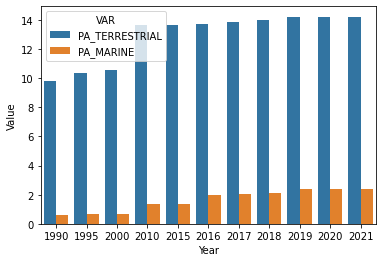

In [30]:
sns.barplot(data=green_country_ireland, y='Value', x='Year', hue='VAR')

<AxesSubplot:xlabel='Year', ylabel='Value'>

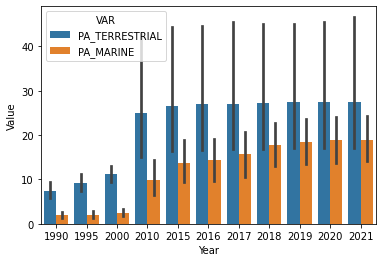

In [31]:
sns.barplot(data=green, y='Value', x='Year', hue='VAR')

Economic Outlook:
1) Getting the dataset via API
2) Converting it to a DataFrame
3) Reviewing the data

In [32]:
def get_from_oecd(sdmx_query):
    return pd.read_csv(
        f"https://stats.oecd.org/SDMX-JSON/data/{sdmx_query}?contentType=csv&startTime=2003&endTime=2023&pid=9b237e1c-7f76-41b7-b7bc-5fa6fbe125df"
    )
economic_outlook =get_from_oecd('EO110_INTERNET/AUS+AUT+BEL+CAN+CHL+COL+CRI+CZE+DNK+EST+FIN+FRA+DEU+GRC+HUN+ISL+IRL+ISR+ITA+JPN+KOR+LVA+LTU+LUX+MEX+NLD+NZL+NOR+POL+PRT+SVK+SVN+ESP+SWE+CHE+TUR+GBR+USA+EA17+NAT+OTO+WLD+NMEC+ARG+BRA+BGR+CHN+IND+IDN+ROU+RUS+ZAF+GRPS+OPEC+PAC+EUR+SOV+DAE+ROW+RWD+OOP+OIL.GDPV_ANNPCT.A/all')

print(economic_outlook.head())

  LOCATION    Country     VARIABLE                                Variable  \
0      AUS  Australia  GDPV_ANNPCT  Gross domestic product, volume, growth   
1      AUS  Australia  GDPV_ANNPCT  Gross domestic product, volume, growth   
2      AUS  Australia  GDPV_ANNPCT  Gross domestic product, volume, growth   
3      AUS  Australia  GDPV_ANNPCT  Gross domestic product, volume, growth   
4      AUS  Australia  GDPV_ANNPCT  Gross domestic product, volume, growth   

  FREQUENCY Frequency  TIME  Time Unit Code        Unit  PowerCode Code  \
0         A    Annual  2003  2003        PC  Percentage               0   
1         A    Annual  2004  2004        PC  Percentage               0   
2         A    Annual  2005  2005        PC  Percentage               0   
3         A    Annual  2006  2006        PC  Percentage               0   
4         A    Annual  2007  2007        PC  Percentage               0   

  PowerCode Reference Period Code Reference Period     Value  Flag Codes  \
0   

In [33]:
economic_outlook.columns

Index(['LOCATION', 'Country', 'VARIABLE', 'Variable', 'FREQUENCY', 'Frequency',
       'TIME', 'Time', 'Unit Code', 'Unit', 'PowerCode Code', 'PowerCode',
       'Reference Period Code', 'Reference Period', 'Value', 'Flag Codes',
       'Flags'],
      dtype='object')

In [34]:
economic_outlook.describe()

,TIME,Time,PowerCode Code,Value,Flag Codes,Flags
count,1134.000000,1134.000000,1134.0,1134.000000,0.0,0.0
mean,2013.000000,2013.000000,0.0,2.782269,NaN,NaN
std,6.057972,6.057972,0.0,3.525247,NaN,NaN
min,2003.000000,2003.000000,0.0,-14.838611,NaN,NaN
25%,2008.000000,2008.000000,0.0,1.460152,NaN,NaN
50%,2013.000000,2013.000000,0.0,2.903394,NaN,NaN
75%,2018.000000,2018.000000,0.0,4.668135,NaN,NaN
max,2023.000000,2023.000000,0.0,25.358044,NaN,NaN


In [35]:
economic_outlook.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1134 entries, 0 to 1133
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LOCATION               1134 non-null   object 
 1   Country                1134 non-null   object 
 2   VARIABLE               1134 non-null   object 
 3   Variable               1134 non-null   object 
 4   FREQUENCY              1134 non-null   object 
 5   Frequency              1134 non-null   object 
 6   TIME                   1134 non-null   int64  
 7   Time                   1134 non-null   int64  
 8   Unit Code              1134 non-null   object 
 9   Unit                   1134 non-null   object 
 10  PowerCode Code         1134 non-null   int64  
 11  PowerCode              1134 non-null   object 
 12  Reference Period Code  1134 non-null   object 
 13  Reference Period       1134 non-null   object 
 14  Value                  1134 non-null   float64
 15  Flag

In [40]:
economic_outlook_variable = economic_outlook["Variable"].unique()
print(economic_outlook_variable)

['Gross domestic product, volume, growth']


In [46]:
e_variables= economic_outlook.groupby(['Country']).count()['Variable'].sort_values(ascending=False)
print(e_variables)

Country
Argentina                       21
Portugal                        21
Latvia                          21
Lithuania                       21
Luxembourg                      21
Mexico                          21
Netherlands                     21
New Zealand                     21
Non-OECD Economies              21
Norway                          21
OECD - Total                    21
Other oil producers             21
Poland                          21
Rest of the World               21
Australia                       21
Romania                         21
Russia                          21
Slovak Republic                 21
Slovenia                        21
South Africa                    21
Spain                           21
Sweden                          21
Switzerland                     21
Turkey                          21
United Kingdom                  21
United States                   21
Korea                           21
Japan                           21
Italy       